In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time
from MLPKANLayer import MLPKANLayer

In [2]:
# Define target function
def target_function(x):
    y = np.zeros_like(x)
    mask1 = x < 0.5
    y[mask1] = np.sin(20 * np.pi * x[mask1]) + x[mask1] ** 2
    mask2 = (0.5 <= x) & (x < 1.5)
    y[mask2] = 0.5 * x[mask2] * np.exp(-x[mask2]) + np.abs(np.sin(5 * np.pi * x[mask2]))
    mask3 = x >= 1.5
    y[mask3] = np.log(x[mask3] - 1) / np.log(2) - np.cos(2 * np.pi * x[mask3])

    return y

In [3]:
# Define MLPKAN
class MLPKAN(nn.Module):
    def __init__(self):
        super(MLPKAN, self).__init__()
        self.MLPkan1 = MLPKANLayer(1, 8, 8, activation=(lambda x: torch.exp(-(x ** 2.0))))
        self.MLPkan2 = MLPKANLayer(8, 1, 8, activation=(lambda x: torch.exp(-(x ** 2.0))))

    def forward(self, x):
        x = self.MLPkan1(torch.permute(x, (1, 0)))
        x = self.MLPkan2(x)
        return torch.permute(x, (1, 0))

Epoch 1/3000, MLP Loss: 2.5479
Epoch 101/3000, MLP Loss: 0.1865
Epoch 201/3000, MLP Loss: 0.1810
Epoch 301/3000, MLP Loss: 0.1666
Epoch 401/3000, MLP Loss: 0.1637
Epoch 501/3000, MLP Loss: 0.1619
Epoch 601/3000, MLP Loss: 0.1400
Epoch 701/3000, MLP Loss: 0.1344
Epoch 801/3000, MLP Loss: 0.1306
Epoch 901/3000, MLP Loss: 0.1297
Epoch 1001/3000, MLP Loss: 0.1261
Epoch 1101/3000, MLP Loss: 0.1151
Epoch 1201/3000, MLP Loss: 0.1024
Epoch 1301/3000, MLP Loss: 0.1058
Epoch 1401/3000, MLP Loss: 0.0915
Epoch 1501/3000, MLP Loss: 0.0798
Epoch 1601/3000, MLP Loss: 0.1083
Epoch 1701/3000, MLP Loss: 0.0702
Epoch 1801/3000, MLP Loss: 0.0675
Epoch 1901/3000, MLP Loss: 0.0636
Epoch 2001/3000, MLP Loss: 0.0585
Epoch 2101/3000, MLP Loss: 0.0428
Epoch 2201/3000, MLP Loss: 0.0399
Epoch 2301/3000, MLP Loss: 0.0381
Epoch 2401/3000, MLP Loss: 0.0387
Epoch 2501/3000, MLP Loss: 0.0303
Epoch 2601/3000, MLP Loss: 0.0183
Epoch 2701/3000, MLP Loss: 0.0092
Epoch 2801/3000, MLP Loss: 0.0064
Epoch 2901/3000, MLP Loss:

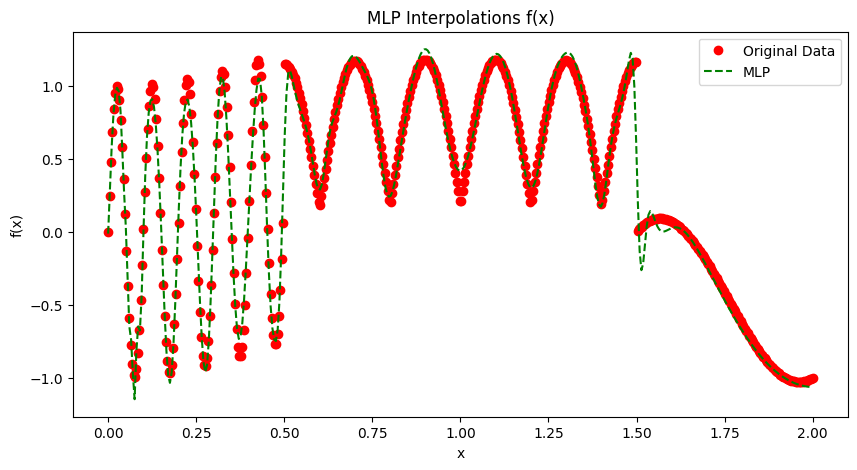

In [4]:
# Set seed
torch.manual_seed(13)

# Generate sample data
x_train = torch.linspace(0, 2, steps=500).unsqueeze(1)
y_train = torch.tensor(target_function(x_train))

# Instantiate models
mlp_model = MLPKAN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer_mlp = torch.optim.Adam(mlp_model.parameters(), lr=0.05)

# Train the models
epochs = 3000
for epoch in range(epochs):
    optimizer_mlp.zero_grad()
    outputs_mlp = mlp_model(x_train)
    loss_mlp = criterion(outputs_mlp, y_train)
    loss_mlp.backward()
    optimizer_mlp.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, MLP Loss: {loss_mlp.item():.4f}')

# Test the models
x_test = torch.linspace(0, 2, steps=400).unsqueeze(1)
y_pred_mlp = mlp_model(x_test).detach()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original Data')
plt.plot(x_test.numpy(), y_pred_mlp.numpy(), 'g--', label='MLP')
plt.title('MLP Interpolations f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [5]:
print(mlp_model.MLPkan2.M1 * mlp_model.MLPkan2.mask1)

tensor([[ 7.3855e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-3.7699e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 4.7822e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 2.7286e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-7.1270e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-2.5730e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.8009e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-2.2853e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.8969